In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape) # Print the database dimensions
pokemon.head(10) # Show first 10 rows

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


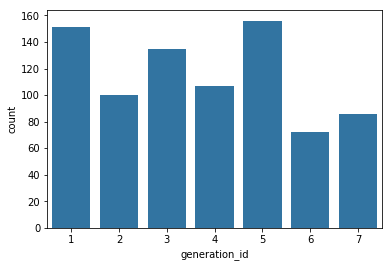

In [4]:
base_color = sb.color_palette()[0]
sb.countplot(data= pokemon, x= 'generation_id', color= base_color);

In [5]:
gen_order = pokemon['generation_id'].value_counts().index # Extracting the order from number of counts

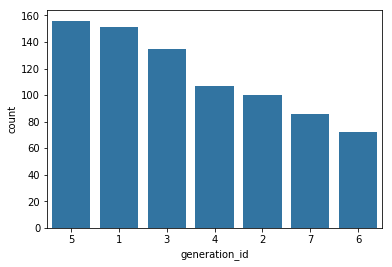

In [6]:
# Let's replot the same graph with the new order
sb.countplot(data= pokemon, x= 'generation_id', color= base_color, order= gen_order);

**Let's plot another variable**

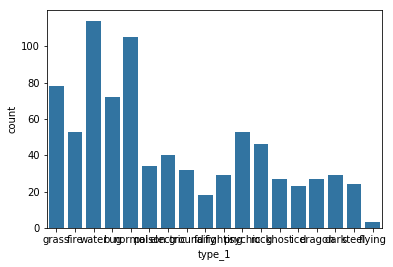

In [7]:
sb.countplot(data= pokemon, x= 'type_1', color= base_color);

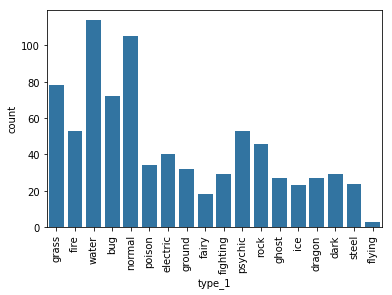

In [8]:
plt.xticks(rotation = 90);
sb.countplot(data= pokemon, x= 'type_1', color= base_color);

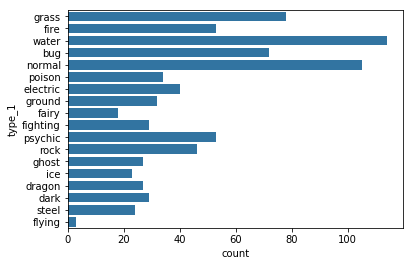

In [9]:
sb.countplot(data= pokemon, y= 'type_1', color= base_color);

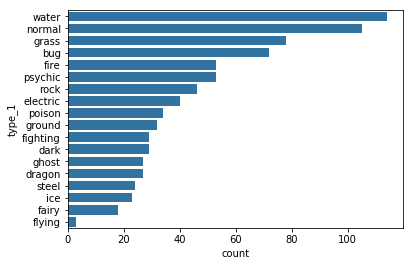

In [10]:
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data= pokemon, y= 'type_1', color= base_color, order= type_order);

**From absolute counts to relative**

In [11]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level', 
                          value_name = 'type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [12]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

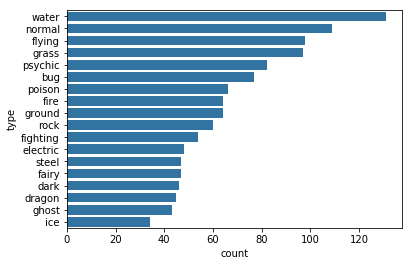

In [13]:
sb.countplot(data= pkmn_types, y = 'type', color= base_color, order= type_order);

In [14]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [15]:
tick_props = np.arange(0, max_prop.max(), 0.02)

In [16]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]


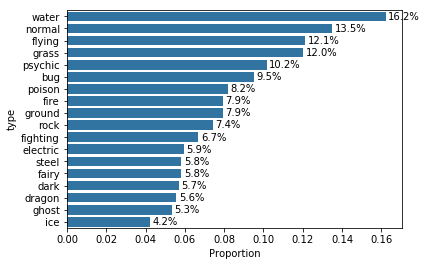

In [17]:
sb.countplot(data= pkmn_types, y = 'type', color= base_color, order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('Proportion');

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string= '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.text(count+1, i, pct_string, va= 'center');

## Subplots and plotting discrete data 

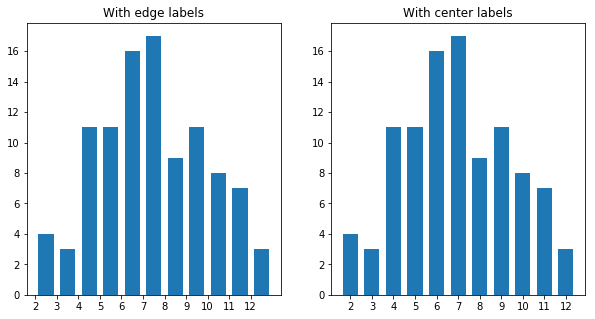

In [18]:
# Simulating two dice rolls. This is an interesting problem. When rolling
# two dices, outcomes like 6 or 7 ar more common than the rest. This is 
# because two events with laplace probability (equal) happen simultaneously

die_rolls = np.random.randint(1, 6+1, 100) + np.random.randint(1, 6+1, 100)

plt.figure(figsize = [10, 5])

# It is recommended to set the parameter rwidth in hist so that the columns
# are separated, which implies that the data plotted is discrete in nature.

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1).set_title('With edge labels')
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1))


# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2).set_title('With center labels')
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1));

## Pie chart example

# Histograms

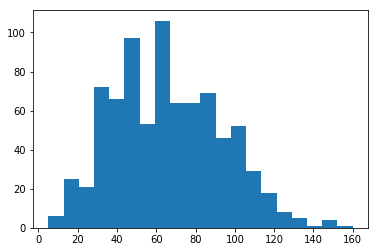

In [19]:
plt.hist(data= pokemon, x= 'speed', bins = 20);

# This sizes the bins so we have a total of 20, but removing the semicolon after
# the sentence reveals that bin edges are non integers while the data are int,
# so some bins span more values than they should


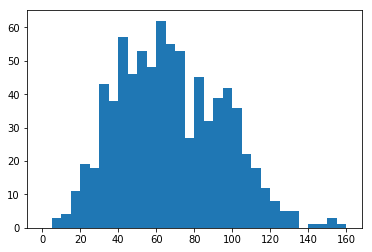

In [20]:
# Histograms bins are intervals of the form [a, b). This means that when creating
# bins using the max() function, those would not be included in the last bin
# unless wee add to the stop argument the size of a bin.

# you can test also that the histogram is rubbish with very small bin sizes 

bin_size = 5
bins = np.arange(0, pokemon['speed'].max() + bin_size, bin_size)
plt.hist(data= pokemon, x= 'speed', bins = bins);

# Uncomment to see the last bin disappearing
# bins = np.arange(0, pokemon['speed'].max() , 5)
# plt.hist(data= pokemon, x= 'speed', bins = bins);

## Kernel Density Estimation (KDE)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


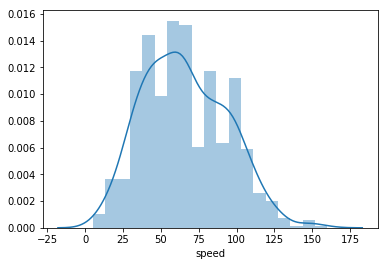

In [21]:
sb.distplot(pokemon['speed']); # if you set kde= False is just a normal histogram

# Axis transformations and scales

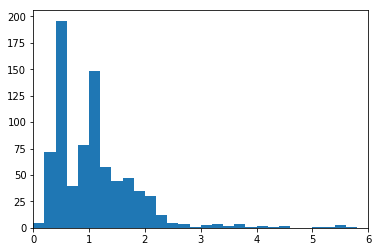

In [22]:
bin_size = 0.2
bins = np.arange(0, pokemon['height'].max() + bin_size, bin_size)
plt.hist(data= pokemon, x= 'height', bins = bins)
plt.xlim((0,6)); # Set the x axis limits

 TO-DO:
 1. Draw a pie chart from one of the pokemon variables according to the recomendations given by the instructor
 2. Write more explanations for each command and plot
 3. Tidy up a headers formats, etc...
 4. Find a suitable name for this notebook
 5. Commit to github

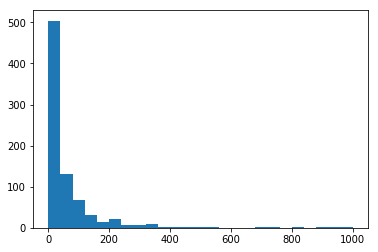

In [26]:
# This graph will benefit from a log x axis
bin_size= 40
bins = np.arange(0, pokemon['weight'].max() + bin_size, bin_size)
plt.hist(data= pokemon, x= 'weight', bins= bins);

In [27]:
np.log10(pokemon['weight'].describe()) # lets find the min and max value of the log

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

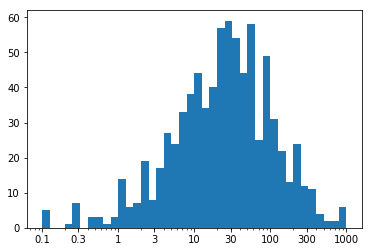

In [30]:
bin_size= 0.1
bins = 10 ** np.arange(-1, 3 + bin_size, bin_size) # Using the previous min, max here

ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks] # Add some nice x axis labels

plt.hist(data= pokemon, x= 'weight', bins= bins);
plt.xscale('log'); # Use a log scaled x axis
plt.xticks(ticks, labels);

Changing the x axis labels as show above consist first in specifying a vector containing the ticks that we would like to change names, and a vector of new labels that would we placed over the selected ticks vector.

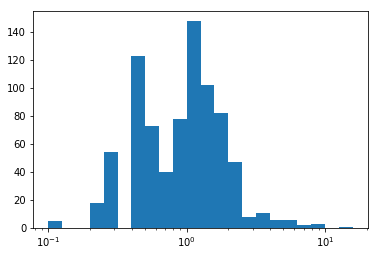

In [31]:
statistics = np.log10(pokemon['height']).describe() # Extract max, min, etc...
bins_size = 0.1
bins = 10 ** np.arange(statistics['min'], statistics['max'] + bins_size, bins_size)

plt.hist(data= pokemon, x= 'height', bins= bins);
plt.xscale('log')